## Student Perfomance Indicator

#### Life cycle of ml project

. Understanding the problem statement<br>
. Data collection<br>
. Data checks to perform<br>
. Exploratory Data Analysis<br>
. Data preprocessing<br>
. Model Training<br>
. Chose best model<br>

## 1)Problem Statement

The project undrstands how the students perfomance (test marks) are affected by various factors like gender, ethnicity , parental education level, lunch,test preparation course,math score,reading score,writing score

# 2)Data collection

. Dataset source https://www.kaggle.com/datasets/spscientist/students-performance-in-exams<br>
. This data consists of 8 columns and 1000 rows

### 2.1) Import Data and libraries<br>
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Import the CSV data as Pandas Dataframe

In [41]:
df = pd.read_csv("data/std_perf.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.shape

(1000, 8)

### Statistical Summary of the dataset

In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


. All the means are very close(between 66 and 68)<br>
. All the standard deviations are really close<br>
. The minimum for maths is zero while writing and reading have quite higher mins

### 2.2) Dataset Information

. Gender -> male/female<br>
. Race/Ethnicity -> Group(A,B,C,D)<br>
. Parental level of education -> (bachelor's degree, some college, master's degree, associate's degree)<br>
. Lunch -> Having lunch before test( standard or free/reduced)<br>
. Maths Score<br>
. Redaing Score<br>
. Writing Score<br>

## 3) Data checks to perform

Check missing values<br>Check duplicate values<br>Check datatypes<br>Check unique values for every column<br>Check various categories for different categorical features

## 3.1) Checking missing values

In [44]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no Null values

## 3.2) Checking Duplicate Values

In [45]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values

## 3.3) Checking Datatypes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4) Checking unique values in each column

In [47]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5) Checking categories for different categorical features

In [48]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [49]:
for col in cat_features:
    print(f"{col}:\n{df[col].unique()}")

gender:
['female' 'male']
race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:
['standard' 'free/reduced']
test preparation course:
['none' 'completed']


## 3.6) Creating Total marks andAvg feature

In [50]:
df["Total_Marks"] = df["math score"] + df["writing score"] + df["reading score"]
df["Avg_marks"] = df["Total_Marks"]/3

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Checking how many students got 100 marks in each subject

In [52]:
maths_full = df[df["math score"] == 100]
writing_full = df[df["writing score"] == 100]
reading_full = df[df["reading score"] == 100]
print(f"Number of students who got full marks in maths {maths_full.shape[0]}")
print(f"Number of students who got full marks in reading {reading_full.shape[0]}")
print(f"Number of students who got full marks in writing {writing_full.shape[0]}")

Number of students who got full marks in maths 7
Number of students who got full marks in reading 17
Number of students who got full marks in writing 14


The number of students with full marks in maths are lower than both reading and writing.

In [53]:
maths_less_20 = df[df["math score"] < 20]
writing__less_20= df[df["writing score"] < 20 ]
reading__less_20 = df[df["reading score"] < 20]
print(f"Number of students who got less than 20 marks in maths {maths_less_20.shape[0]}")
print(f"Number of students who got less than 20 marks in reading {reading__less_20.shape[0]}")
print(f"Number of students who got less than 20 marks in writing {writing__less_20.shape[0]}")

Number of students who got less than 20 marks in maths 4
Number of students who got less than 20 marks in reading 1
Number of students who got less than 20 marks in writing 3


Again the number of students with marks less than 20 are highest for maths<br>
The students have performed worst in maths and best in reading

## 4) Exploratpry Data Analaysis (Vizualization)

### 4.1) Vizualize average score distribution to make some conclusions
<br>
. Histogram<br>
. Kernel Density Estimator

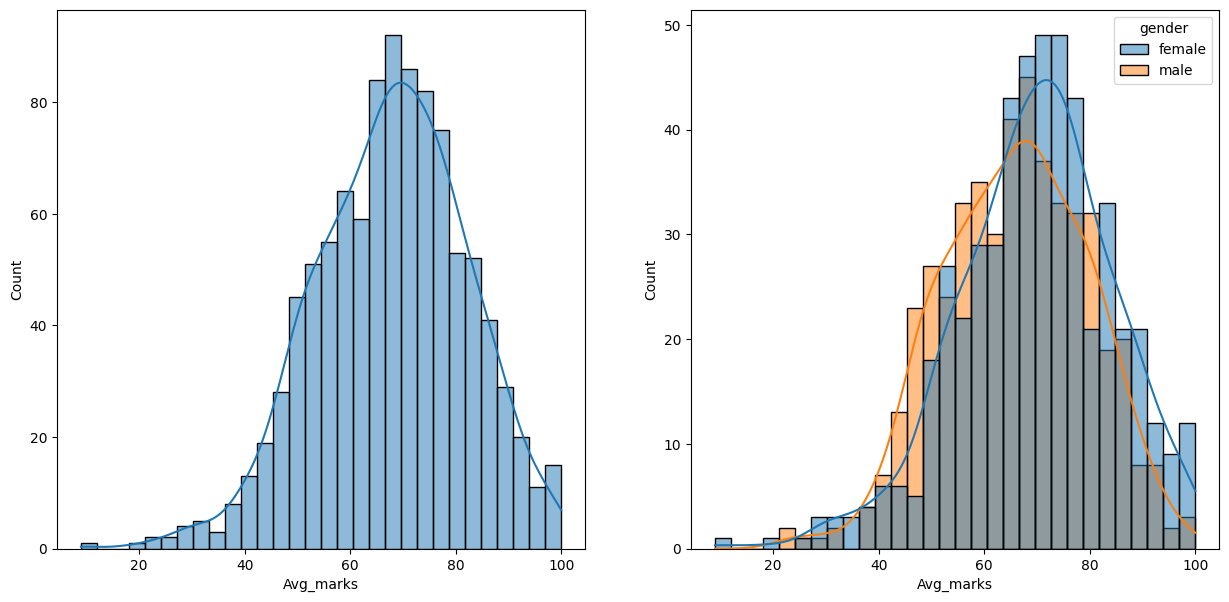

In [54]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Avg_marks", kde=True, bins=30)


plt.subplot(1,2,2)
sns.histplot(data=df, x="Avg_marks", kde=True, bins=30, hue="gender")
plt.show()


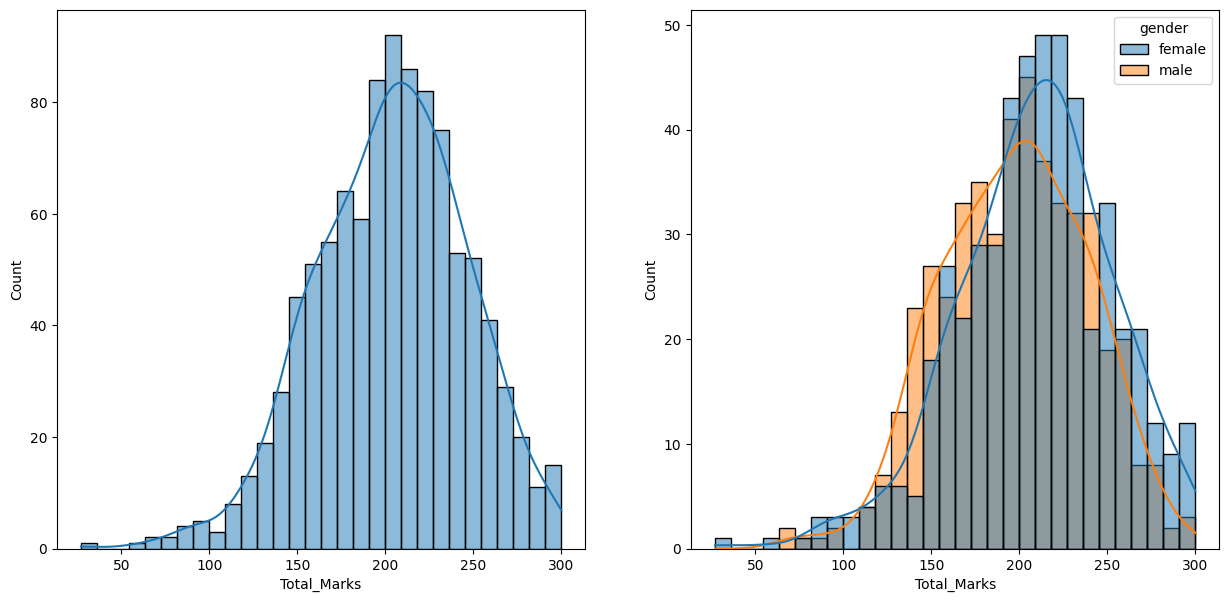

In [55]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30)


plt.subplot(1,2,2)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30, hue="gender")
plt.show()


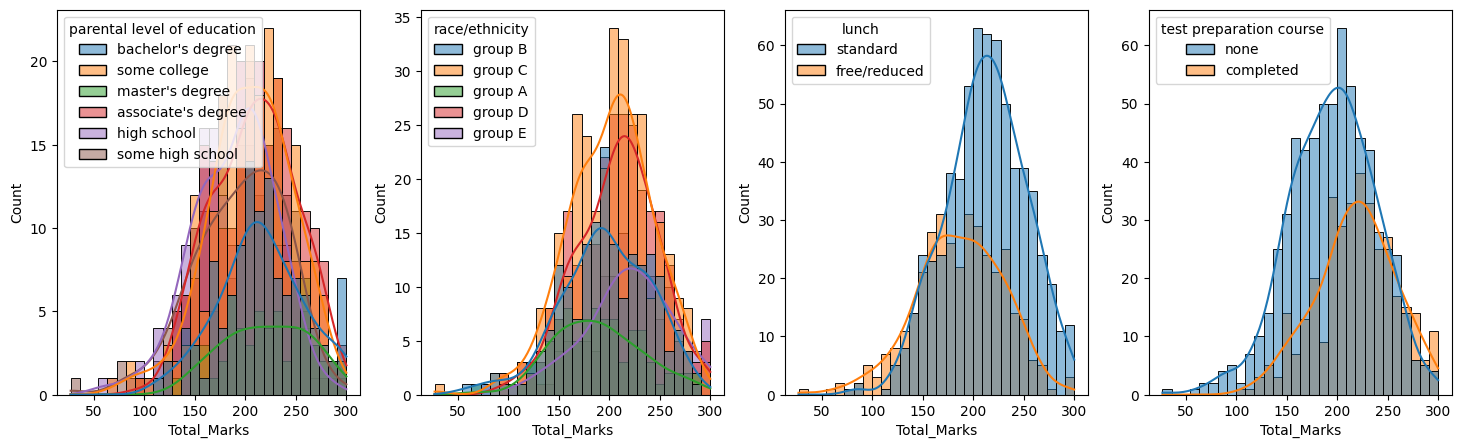

In [57]:
plt.figure(figsize=(18, 5))
plt.subplot(1,4,1)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30, hue="parental level of education")


plt.subplot(1,4,2)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30, hue="race/ethnicity")

plt.subplot(1,4,3)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30, hue="lunch")

plt.subplot(1,4,4)
sns.histplot(data=df, x="Total_Marks", kde=True, bins=30, hue="test preparation course")

plt.show()





### Insights
. Female tends to perform well in the tests<br>
. Parental education doesnot have significant impact on their child perfomane in the test<br>
. Students whose parents have some college or associate degree seems to perform well<br>
. Group A has perfomed the worst whilst group C performed the best in the tests.<br>
. Students who have lunch before the test performed well.<br>

## 4.2) Bivariate Analysis

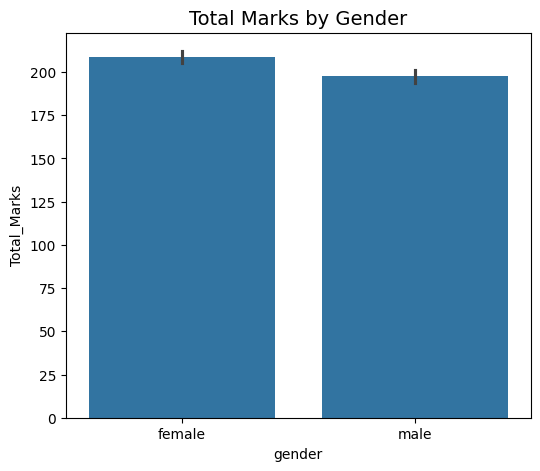

In [63]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="gender", y="Total_Marks")
plt.title("Total Marks by Gender", fontsize=14)
plt.show()

#### Which Gender performed well in Mathematics

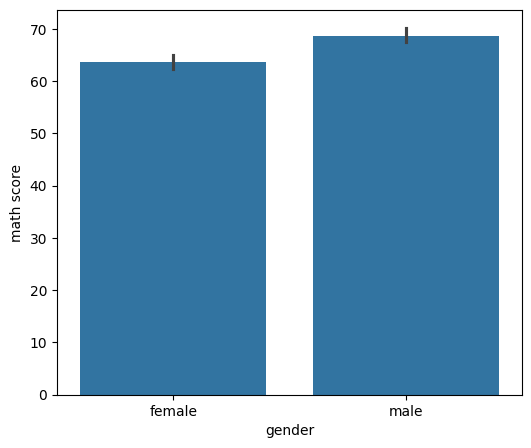

In [66]:
plt.figure(figsize=(6,5))
sns.barplot(x=df["gender"], y=df["math score"])
plt.show()

#### Insights<br>
. Females performed well over all and got more marks than Males<br>
. Makes performed relatively well in maths test


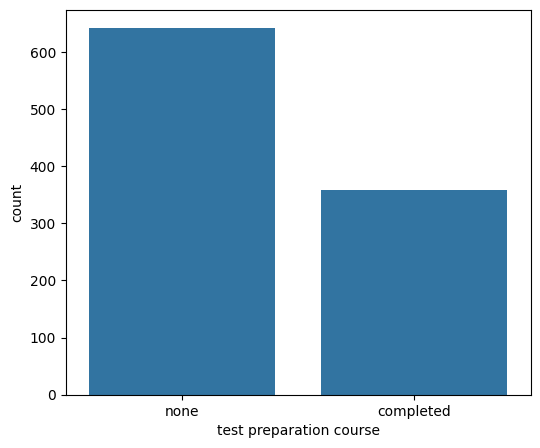

In [74]:
plt.figure(figsize=(6,5))
sns.countplot(x=df["test preparation course"])
plt.show()

#### Insights<br>

A large number of students didnot complete the test preparation course.

### Does Lunch(Socio-economic status affects) test marks

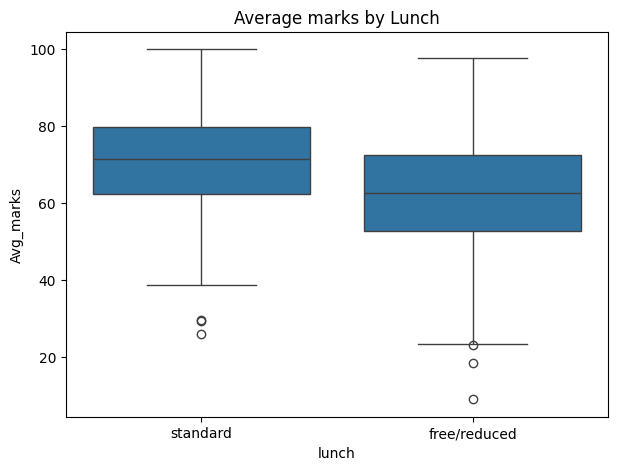

In [75]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["lunch"], y=df["Avg_marks"])
plt.title("Average marks by Lunch")
plt.show()

. Students who have standard Lunch(better socio-economic status) tends to perform well in the test<br>
. Socio-economic status plays a significant role in influencing students' academic performance

In [84]:
df.groupby(["lunch", "test preparation course"])["test preparation course"].count()/len(df)*100

lunch         test preparation course
free/reduced  completed                  13.1
              none                       22.4
standard      completed                  22.7
              none                       41.8
Name: test preparation course, dtype: float64

#### Insights<br>
. Most students who had standard lunch, still they didnot take the preparation course.<br>
. Students who had free/reduced lunch(lower socio-economic status) are underrepresenred in the test preparation course.

### Does test preparation course helped students to get better test results

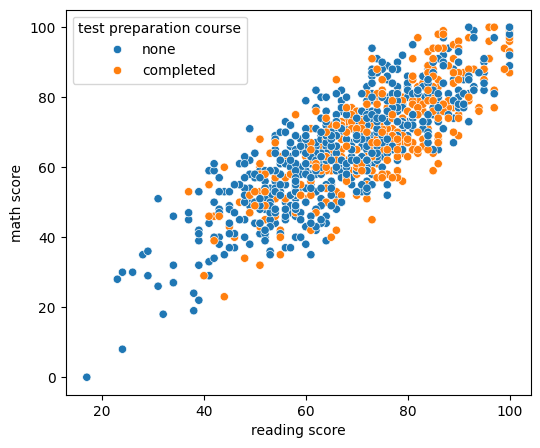

In [81]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["reading score"], y=df["math score"], hue=df["test preparation course"])
plt.show()

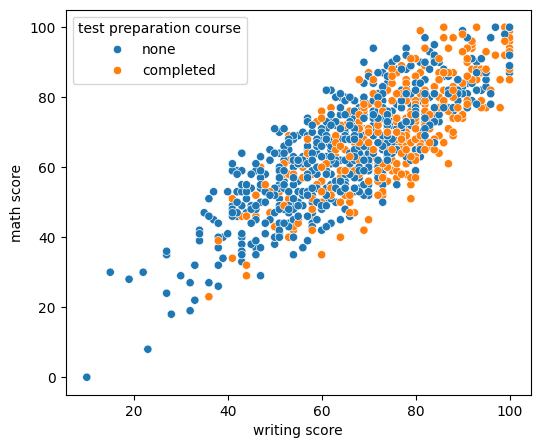

In [82]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["writing score"], y=df["math score"], hue=df["test preparation course"])
plt.show()

#### Insights<br>

. All the students who have taken the course have scored well in the tests, majority of them have scored above average.<br>
. Preparation courses seemed effective. 